# Titanic Disaster

In this reboot, we will explore the famous [Titanic](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv) dataset listing all passengers with various properties.

❓ Start loading `matplotlib`, `numpy` and `pandas` the usual way

In [1]:
# your code here
import numpy as np
import pandas as pd
import matplotlib

❓ Run `!ls -lh` to list files in the current folder. You should see a `.csv` file.

In [3]:
# your code here
!ls -lh

total 144
-rw-r--r--  1 smrack  staff   2.3K Apr 19 22:40 README.md
-rw-r--r--  1 smrack  staff   8.0K Apr 26 17:09 Recap.ipynb
-rw-r--r--  1 smrack  staff    60K Apr 26 17:11 titanic.csv


In [6]:
!head titanic.csv

❓ Load the CSV data as a into a `titanic_df` variable.

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [24]:
# your code here
titanic_df = pd.read_csv('titanic.csv', sep=',', decimal='.')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


❓ Explore the dataset with the usual methods (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

Do not hesitate to add cells by pressing `B`.

In [25]:
# your code here
titanic_df.shape

(891, 12)

In [26]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [27]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


It seems that the `Cabin` information is missing in 687 rows. Pretty normal considering people in 3rd class (`Pclass`) did not have one!

❓ Use the [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function to get rid of the `Cabin` in `titanic_df`

In [30]:
# your code here
titanic_df.drop(['Cabin'], axis=1, inplace=True)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Classes Analysis

Let's have a look at the ticket divide.

❓ Using a `groupby()`, create a `pclass_df` dataframe counting the number of tickets sold per class (1, 2 or 3)

In [32]:
# your code here
titanic_df[['Pclass', 'PassengerId']].groupby('Pclass').count()

,PassengerId
Pclass,
1,216
2,184
3,491


In [34]:
pclass_df = titanic_df[['Pclass', 'Ticket']].groupby('Pclass').count()
pclass_df

,Ticket
Pclass,
1,216
2,184
3,491


Looking at the number is not very visual, let's try to make sense of the data with a plot.

❓ Plot the `pclass_df` dataframe built in the previous question as a barchart

<AxesSubplot:xlabel='Pclass'>

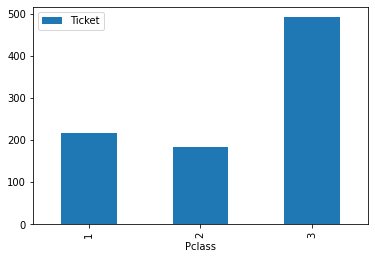

In [39]:
pclass_df.plot(kind="bar")

Let's now have a look at **survivors**.

❓ Plot a barchart of *frequency of survivals* per class. `0` means no one survived in the class, `1` means everyone survived.

In [8]:
# your code here

### Gender Analysis

Let's have a look at the `Sex` column.

❓ Use the [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to check the different values used in that column

In [10]:
# your code here

❓ Plot a barchart of survival frequency of each gender. Who survived the most?

In [11]:
# your code here

Let's build a fancier histogram where we show the total number of passengers + the total number of survivors (for each gender).

❓ Build a `survivors_df` DataFrame with two columns: `Total` and `Survived`, and two rows (`male` and `female`). Plot it.

In [12]:
# your code here

## Children

The former analysis did not take into account ages. We want to differentiate between a child and an adult and see how survival rates are affected.

❓ Use boolean indexing to create a `children_df` containing only rows of child passengers

In [13]:
# your code here

❓ How many children were there in the Titanic?

In [14]:
# your code here

❓ How many children survived?

In [15]:
# your code here

❓ Plot a barchart of survivors / total for each category: `male`, `female`, `children`. Bear in mind that you need to **substract** the boys from the `male` statistics, and the girls from the `female` statistics.

In [16]:
# your code here